# Week sinusoidal encoding

This notebook describe sin-cos cyclic encoding for week number

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append("../../src/")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import data
import pymmwr

## Load and split data

In [5]:
adl = data.ActualDataLoader("../../data")
index, wili = adl.get()

## Encode epiweek

In [7]:
def encode_epiweek(epiweek: int):
    """
    Encode epiweek of the form YYYYWW
    """
    
    year = epiweek // 100
    week = epiweek % 100
    
    # Get the limit of weeks in year
    n_weeks = pymmwr.mmwr_weeks_in_year(year)
    
    radian = 2 * np.pi * week / n_weeks
    
    return np.array([np.sin(radian), np.cos(radian)])

## Components of encoding

The plot below shows the value encoding numbers over the epiweeks

In [16]:
# Using a known max weeks year
year = 2017
n_weeks = pymmwr.mmwr_weeks_in_year(year)

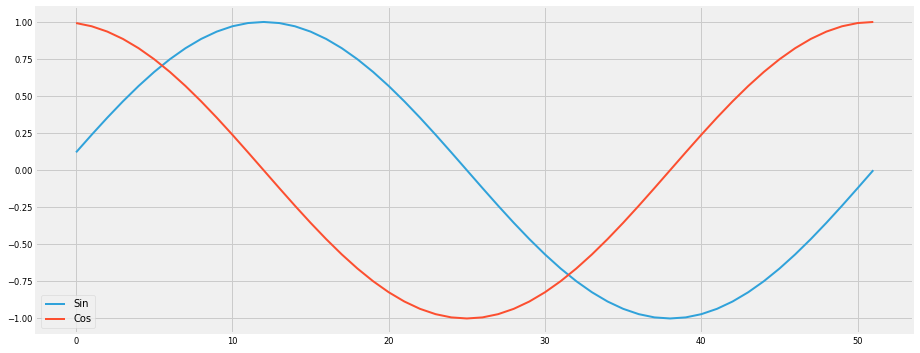

In [23]:
plt.figure(figsize=(14, 6))
encodings = np.array([encode_epiweek(year * 100 + ew + 1) for ew in range(n_weeks)])
plt.plot(encodings[:, 0], label="Sin")
plt.plot(encodings[:, 1], label="Cos")
plt.legend()